<h1 style='color: green; font-size: 36px; font-weight: bold;'>Data Science - Regressão Linear</h1>

# <font color='red' style='font-size: 30px;'>Conhecendo o Dataset</font>
<hr style='border: 2px solid red;'>

## Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings

warnings.filterwarnings('ignore')

## O Dataset e o Projeto
<hr>

### Fonte: https://www.kaggle.com/greenwing1985/housepricing

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Nosso objetivo neste exercício é criar um modelo de machine learning, utilizando a técnica de Regressão Linear, que faça previsões sobre os preços de imóveis a partir de um conjunto de características conhecidas dos imóveis.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Vamos utilizar um dataset disponível no Kaggle que foi gerado por computador para treinamento de machine learning para iniciantes. Este dataset foi modificado para facilitar o nosso objetivo, que é fixar o conhecimento adquirido no treinamento de Regressão Linear.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Siga os passos propostos nos comentários acima de cada célular e bons estudos.</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>precos</b> - Preços do imóveis</li>
    <li><b>area</b> - Área do imóvel</li>
    <li><b>garagem</b> - Número de vagas de garagem</li>
    <li><b>banheiros</b> - Número de banheiros</li>
    <li><b>lareira</b> - Número de lareiras</li>
    <li><b>marmore</b> - Se o imóvel possui acabamento em mármore branco (1) ou não (0)</li>
    <li><b>andares</b> - Se o imóvel possui mais de um andar (1) ou não (0)</li>
</ul>

## Leitura dos dados

Dataset está na pasta "Dados" com o nome "HousePrices_HalfMil.csv" em usa como separador ";".

In [3]:
dados = pd.read_csv('HousePrices_HalfMil.csv')

## Visualizar os dados

In [4]:
dados.head()

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices
0,164,2,0,2,0,1,0,0,3,1,1,1,1,0,0,43800
1,84,2,0,4,0,0,1,1,2,0,0,0,1,1,1,37550
2,190,2,4,4,1,0,0,0,2,0,0,1,0,0,0,49500
3,75,2,4,4,0,0,1,1,1,1,1,1,1,1,1,50075
4,148,1,4,2,1,0,0,1,2,1,0,0,1,1,1,52400


In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   Area           500000 non-null  int64
 1   Garage         500000 non-null  int64
 2   FirePlace      500000 non-null  int64
 3   Baths          500000 non-null  int64
 4   White Marble   500000 non-null  int64
 5   Black Marble   500000 non-null  int64
 6   Indian Marble  500000 non-null  int64
 7   Floors         500000 non-null  int64
 8   City           500000 non-null  int64
 9   Solar          500000 non-null  int64
 10  Electric       500000 non-null  int64
 11  Fiber          500000 non-null  int64
 12  Glass Doors    500000 non-null  int64
 13  Swiming Pool   500000 non-null  int64
 14  Garden         500000 non-null  int64
 15  Prices         500000 non-null  int64
dtypes: int64(16)
memory usage: 61.0 MB


## Verificando o tamanho do dataset

In [6]:
dados.shape

(500000, 16)

# <font color='red' style='font-size: 30px;'>Análises Preliminares</font>
<hr style='border: 2px solid red;'>

## Estatísticas descritivas

In [7]:
dados.describe()

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.00000,500000.000000,500000.00000,500000.000000,500000.000000,500000.000000
mean,124.929554,2.001290,2.003398,2.998074,0.332992,0.332690,0.334318,0.499386,2.000940,0.498694,0.50065,0.500468,0.49987,0.500436,0.501646,42050.139350
std,71.795363,0.817005,1.414021,1.414227,0.471284,0.471177,0.471752,0.500000,0.816209,0.499999,0.50000,0.500000,0.50000,0.500000,0.499998,12110.237201
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,7725.000000
25%,63.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,33500.000000
50%,125.000000,2.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.00000,1.000000,0.00000,1.000000,1.000000,41850.000000
75%,187.000000,3.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,50750.000000
max,249.000000,3.000000,4.000000,5.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,77975.000000


## Matriz de correlação

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>coeficiente de correlação</b> é uma medida de associação linear entre duas variáveis e situa-se entre <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indica associação negativa perfeita e <b>+1</b> indica associação positiva perfeita.</p>

### Observe as correlações entre as variáveis:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>Quais são mais correlacionadas com a variável dependete (Preço)?</li>
    <li>Qual o relacionamento entre elas (positivo ou negativo)?</li>
    <li>Existe correlação forte entre as variáveis explicativas?</li>
</ul>

In [8]:
correlacao = dados.corr().round(4)

In [9]:
correlacao.style.background_gradient('pink')

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices
Area,1.000000,-0.000900,0.000400,-0.000400,0.002500,-0.001500,-0.001000,-0.000800,-0.003500,0.000500,-0.000100,0.000100,-0.001200,0.000600,0.001400,0.147700
Garage,-0.000900,1.000000,0.001300,-0.003600,0.000500,0.001800,-0.002400,-0.000900,0.000800,0.001500,0.000800,-0.000600,-0.002200,0.001100,-0.000700,0.100300
FirePlace,0.000400,0.001300,1.000000,0.000600,0.001000,-0.000900,-0.000000,0.000200,-0.000200,-0.000300,0.001300,0.001800,-0.000400,0.001300,0.000200,0.089100
Baths,-0.000400,-0.003600,0.000600,1.000000,0.002500,-0.002700,0.000200,-0.000900,-0.000900,-0.000800,0.001000,-0.000700,-0.001700,0.002200,0.001700,0.145100
White Marble,0.002500,0.000500,0.001000,0.002500,1.000000,-0.498900,-0.500700,0.000100,-0.000900,-0.001600,0.000600,-0.000600,-0.000400,-0.001900,0.001000,0.448200
Black Marble,-0.001500,0.001800,-0.000900,-0.002700,-0.498900,1.000000,-0.500400,-0.000400,-0.000300,0.001800,-0.000500,0.000100,0.000100,0.000700,0.000100,-0.078000
Indian Marble,-0.001000,-0.002400,-0.000000,0.000200,-0.500700,-0.500400,1.000000,0.000300,0.001200,-0.000200,-0.000000,0.000500,0.000300,0.001200,-0.001100,-0.369800
Floors,-0.000800,-0.000900,0.000200,-0.000900,0.000100,-0.000400,0.000300,1.000000,-0.000600,-0.002700,0.000100,0.001400,-0.000000,-0.000200,-0.000500,0.619500
City,-0.003500,0.000800,-0.000200,-0.000900,-0.000900,-0.000300,0.001200,-0.000600,1.000000,0.000500,0.000800,-0.002700,0.000800,0.000300,0.001200,0.233300
Solar,0.000500,0.001500,-0.000300,-0.000800,-0.001600,0.001800,-0.000200,-0.002700,0.000500,1.000000,0.001900,0.000200,-0.000800,-0.000500,-0.004300,0.008400


* Maiores correlações com o preço:  Floors,Fiber, White Marble, Glass Doors
* Relação positiva
* Maior relação na variável Floors (Andares)

# <font color='red' style='font-size: 30px;'>Comportamento da Variável Dependente (Y)</font>
<hr style='border: 2px solid red;'>

# Análises gráficas

<img width='600px' src='../Data/img/Box-Plot.png'>

## Importando biblioteca seaborn

In [10]:
import seaborn as sns

## Configure o estilo e cor dos gráficos (opcional)

In [11]:
sns.set_style("darkgrid")

## Box plot da variável *dependente* (y)


### Avalie o comportamento da distribuição da variável dependente:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>Parecem existir valores discrepantes (outliers)?</li>
    <li>O box plot apresenta alguma tendência?</li>
</ul>

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

<AxesSubplot:title={'center':'Boxplot - Preço dos Imóveis'}, ylabel='Preço'>

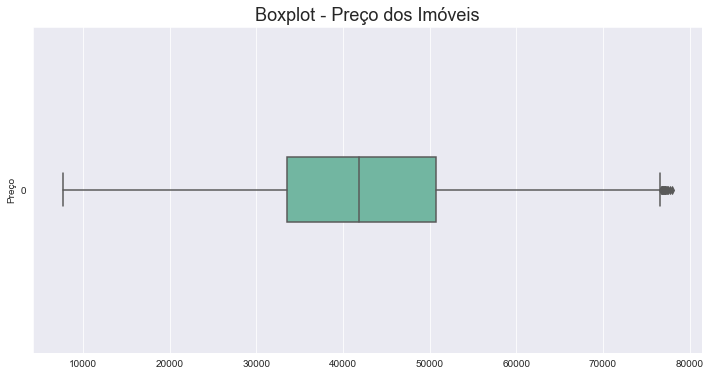

In [12]:
# Gráfico
ax = sns.boxplot(data = dados['Prices'], orient = 'h', width= 0.2, palette = 'Set2')

# Configs

ax.figure.set_size_inches(12,6)
ax.set_title('Boxplot - Preço dos Imóveis', fontsize=18)
ax.set_ylabel('Preço')
ax

* Existem valores discrepantes
* No gráfico percebemos que tende-se um assimetria a direita

## Investigando a variável *dependente* (y) juntamente com outras característica

Faça um box plot da variável dependente em conjunto com cada variável explicativa (somente as categóricas).

### Avalie o comportamento da distribuição da variável dependente com cada variável explicativa categórica:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>As estatísticas apresentam mudança significativa entre as categorias?</li>
    <li>O box plot apresenta alguma tendência bem definida?</li>
</ul>

### Box-plot (Preço X Garagem)

<AxesSubplot:title={'center':'Preço x Garagem'}, xlabel='Preço', ylabel='Qntd de Garagem'>

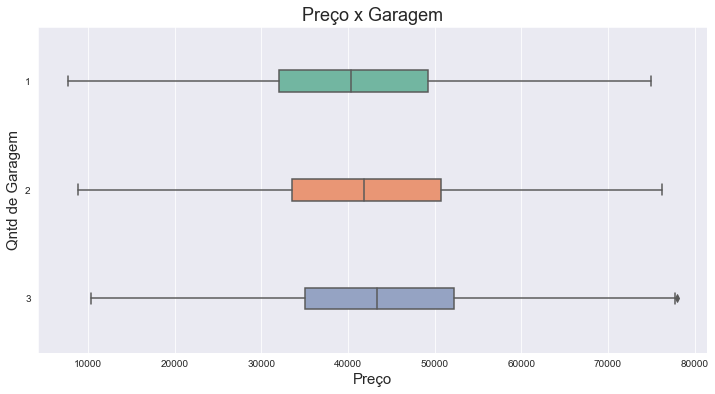

In [13]:
# Gráfico
ax = sns.boxplot(data = dados, x = dados['Prices'], y = dados['Garage'], orient = 'h', width= 0.2, palette = 'Set2')

# Configs
ax.figure.set_size_inches(12,6)
ax.set_title('Preço x Garagem', fontsize = 18)
ax.set_ylabel('Qntd de Garagem', fontsize = 15)
ax.set_xlabel('Preço', fontsize=15)
ax

* Percebe-se uma tendência de quanto mais garagens maior o preço do imóvel
* Analisa-se que imóveis com 3 garagens possuem alguns valores outliers em relação ao Preço

### Box-plot (Preço X Banheiros)

<AxesSubplot:title={'center':'Boxplot - Preço x Banheiros'}, xlabel='Preço', ylabel='Qntd de Banheiros'>

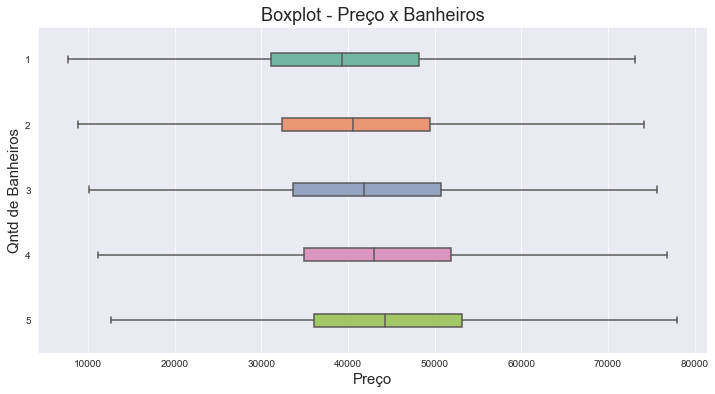

In [14]:
ax = sns.boxplot(data=dados, x= dados['Prices'], y=dados['Baths'],
                 width=0.2, orient='h', palette='Set2')


ax.figure.set_size_inches(12,6)
ax.set_title('Boxplot - Preço x Banheiros', fontsize = 18)
ax.set_ylabel('Qntd de Banheiros', fontsize = 15)
ax.set_xlabel('Preço', fontsize = 15)
ax

### Box-plot (Preço X Lareira)

<AxesSubplot:title={'center':'Preço x Lareira'}, xlabel='Preço', ylabel='Qntd de Lareiras'>

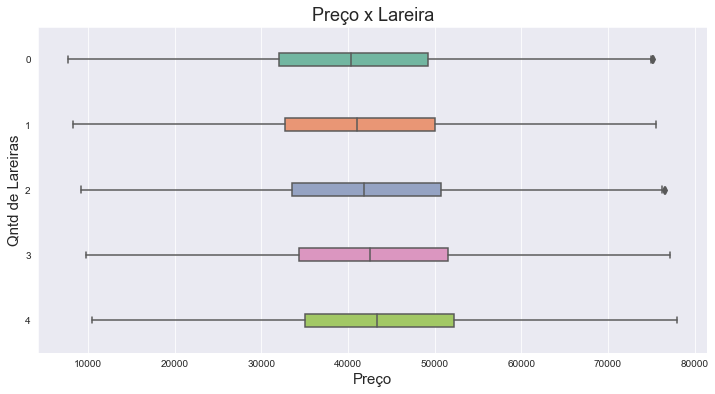

In [15]:
ax = sns.boxplot(data=dados, x=dados['Prices'], y=dados['FirePlace'],
                 width=0.2, orient='h', palette='Set2')

ax.figure.set_size_inches(12,6)
ax.set_title('Preço x Lareira', fontsize = 18)
ax.set_ylabel('Qntd de Lareiras', fontsize = 15)
ax.set_xlabel('Preço', fontsize = 15)
ax

* Percebe-se outliers em imóveis sem nenhuma lareira e com duas lareiras
* A media dos imóveis de 0 a 4 lareiras se encontram entra 40.000 e 50.00

### Box-plot (Preço X Acabamento em Mármore)

<AxesSubplot:title={'center':'Preço x Acabamento em Marmóre Branco'}, xlabel='Preço', ylabel='Acabamento em Marmóre Branco'>

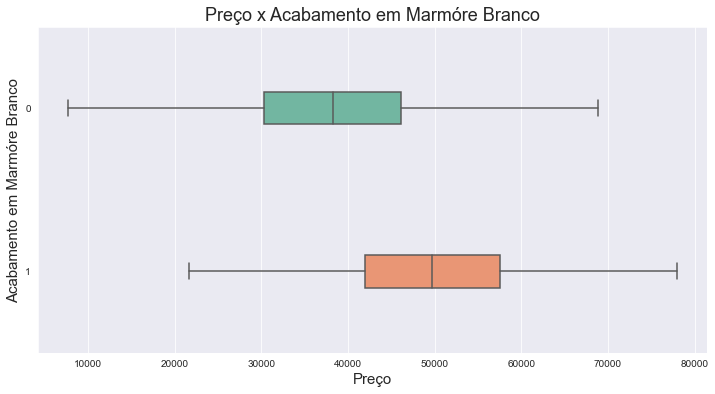

In [16]:
ax = sns.boxplot(data=dados, x=dados['Prices'], y=dados['White Marble'],
                width=0.2, orient='h', palette='Set2' )

ax.figure.set_size_inches(12,6)
ax.set_title('Preço x Acabamento em Marmóre Branco', fontsize=18)
ax.set_ylabel('Acabamento em Marmóre Branco', fontsize=15)
ax.set_xlabel('Preço', fontsize=15)
ax

* Percebe-se que imóveis sem acabamento de mármore branco possuem uma mediana abaixo de 40.000 no preço, enquanto os que possuem acabamento de mármore branco possuem mediana próximo dos 50.000.
* Os valores min dos imóveis que possuem acabamento em mármore começam a partir de 20.000, equanto os sem mármore começam aproximadamente 9.000.

### Box-plot (Preço X Andares)

<AxesSubplot:title={'center':'Preço x Andares'}, xlabel='Preço', ylabel='Andares'>

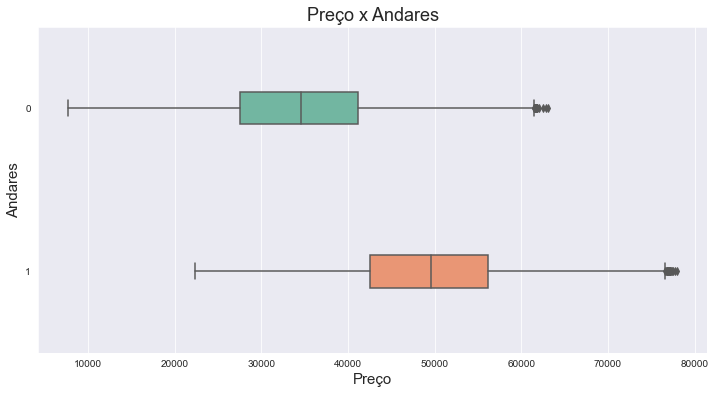

In [17]:
ax = sns.boxplot(data=dados, x=dados['Prices'], y=dados['Floors'],
                width=0.2, orient='h', palette='Set2' )

ax.figure.set_size_inches(12,6)
ax.set_title('Preço x Andares', fontsize=18)
ax.set_ylabel('Andares', fontsize=15)
ax.set_xlabel('Preço', fontsize=15)
ax

* Percebe-se uma grande diferença da mediana de imóveis com 1 andar e sem andar. 
* Ambos possuem outliers, sendo imóveis sem andares tendo o preço do outlier em volta de 63.000, já os imóveis que possuem andar percebe-se um valor mais elevado no preço, com outliers aproximados de 78.000.

## Distribuição de frequências da variável *dependente* (y)

Construa um histograma da variável dependente (Preço).

### Avalie:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>A distribuição de frequências da variável dependente parece ser assimétrica?</li>
    <li>É possível supor que a variável dependente segue uma distribuição normal?</li>
</ul>

https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

Text(0.5, 1.0, 'Histograma da variável - Preço')

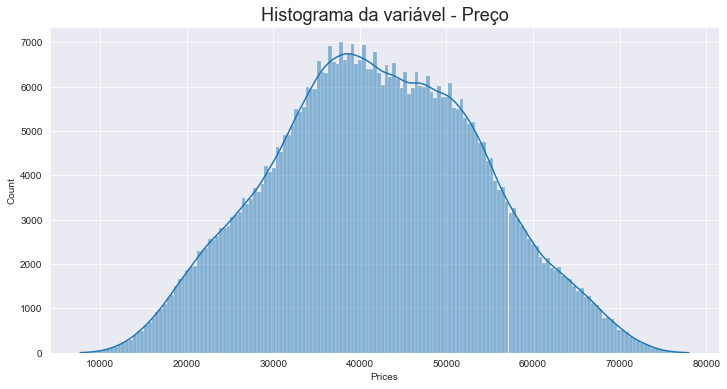

In [18]:
ax = sns.histplot(dados['Prices'], kde = True)

ax.figure.set_size_inches(12,6)
ax.set_title('Histograma da variável - Preço', fontsize = 18)

* O histograma não possui a princípio uma assimetria grande
* Não podemos dizer que a variável dependente segue uma distribuição normal, porém há uma tendência.

## Gráficos de dispersão entre as variáveis do dataset

## Plotando o pairplot fixando somente uma variável no eixo y

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

Plote gráficos de dispersão da variável dependente contra cada variável explicativa. Utilize o pairplot da biblioteca seaborn para isso.

Plote o mesmo gráfico utilizando o parâmetro kind='reg'.

### Avalie:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>É possível identificar alguma relação linear entre as variáveis?</li>
    <li>A relação é positiva ou negativa?</li>
    <li>Compare com os resultados obtidos na matriz de correlação.</li>
</ul>

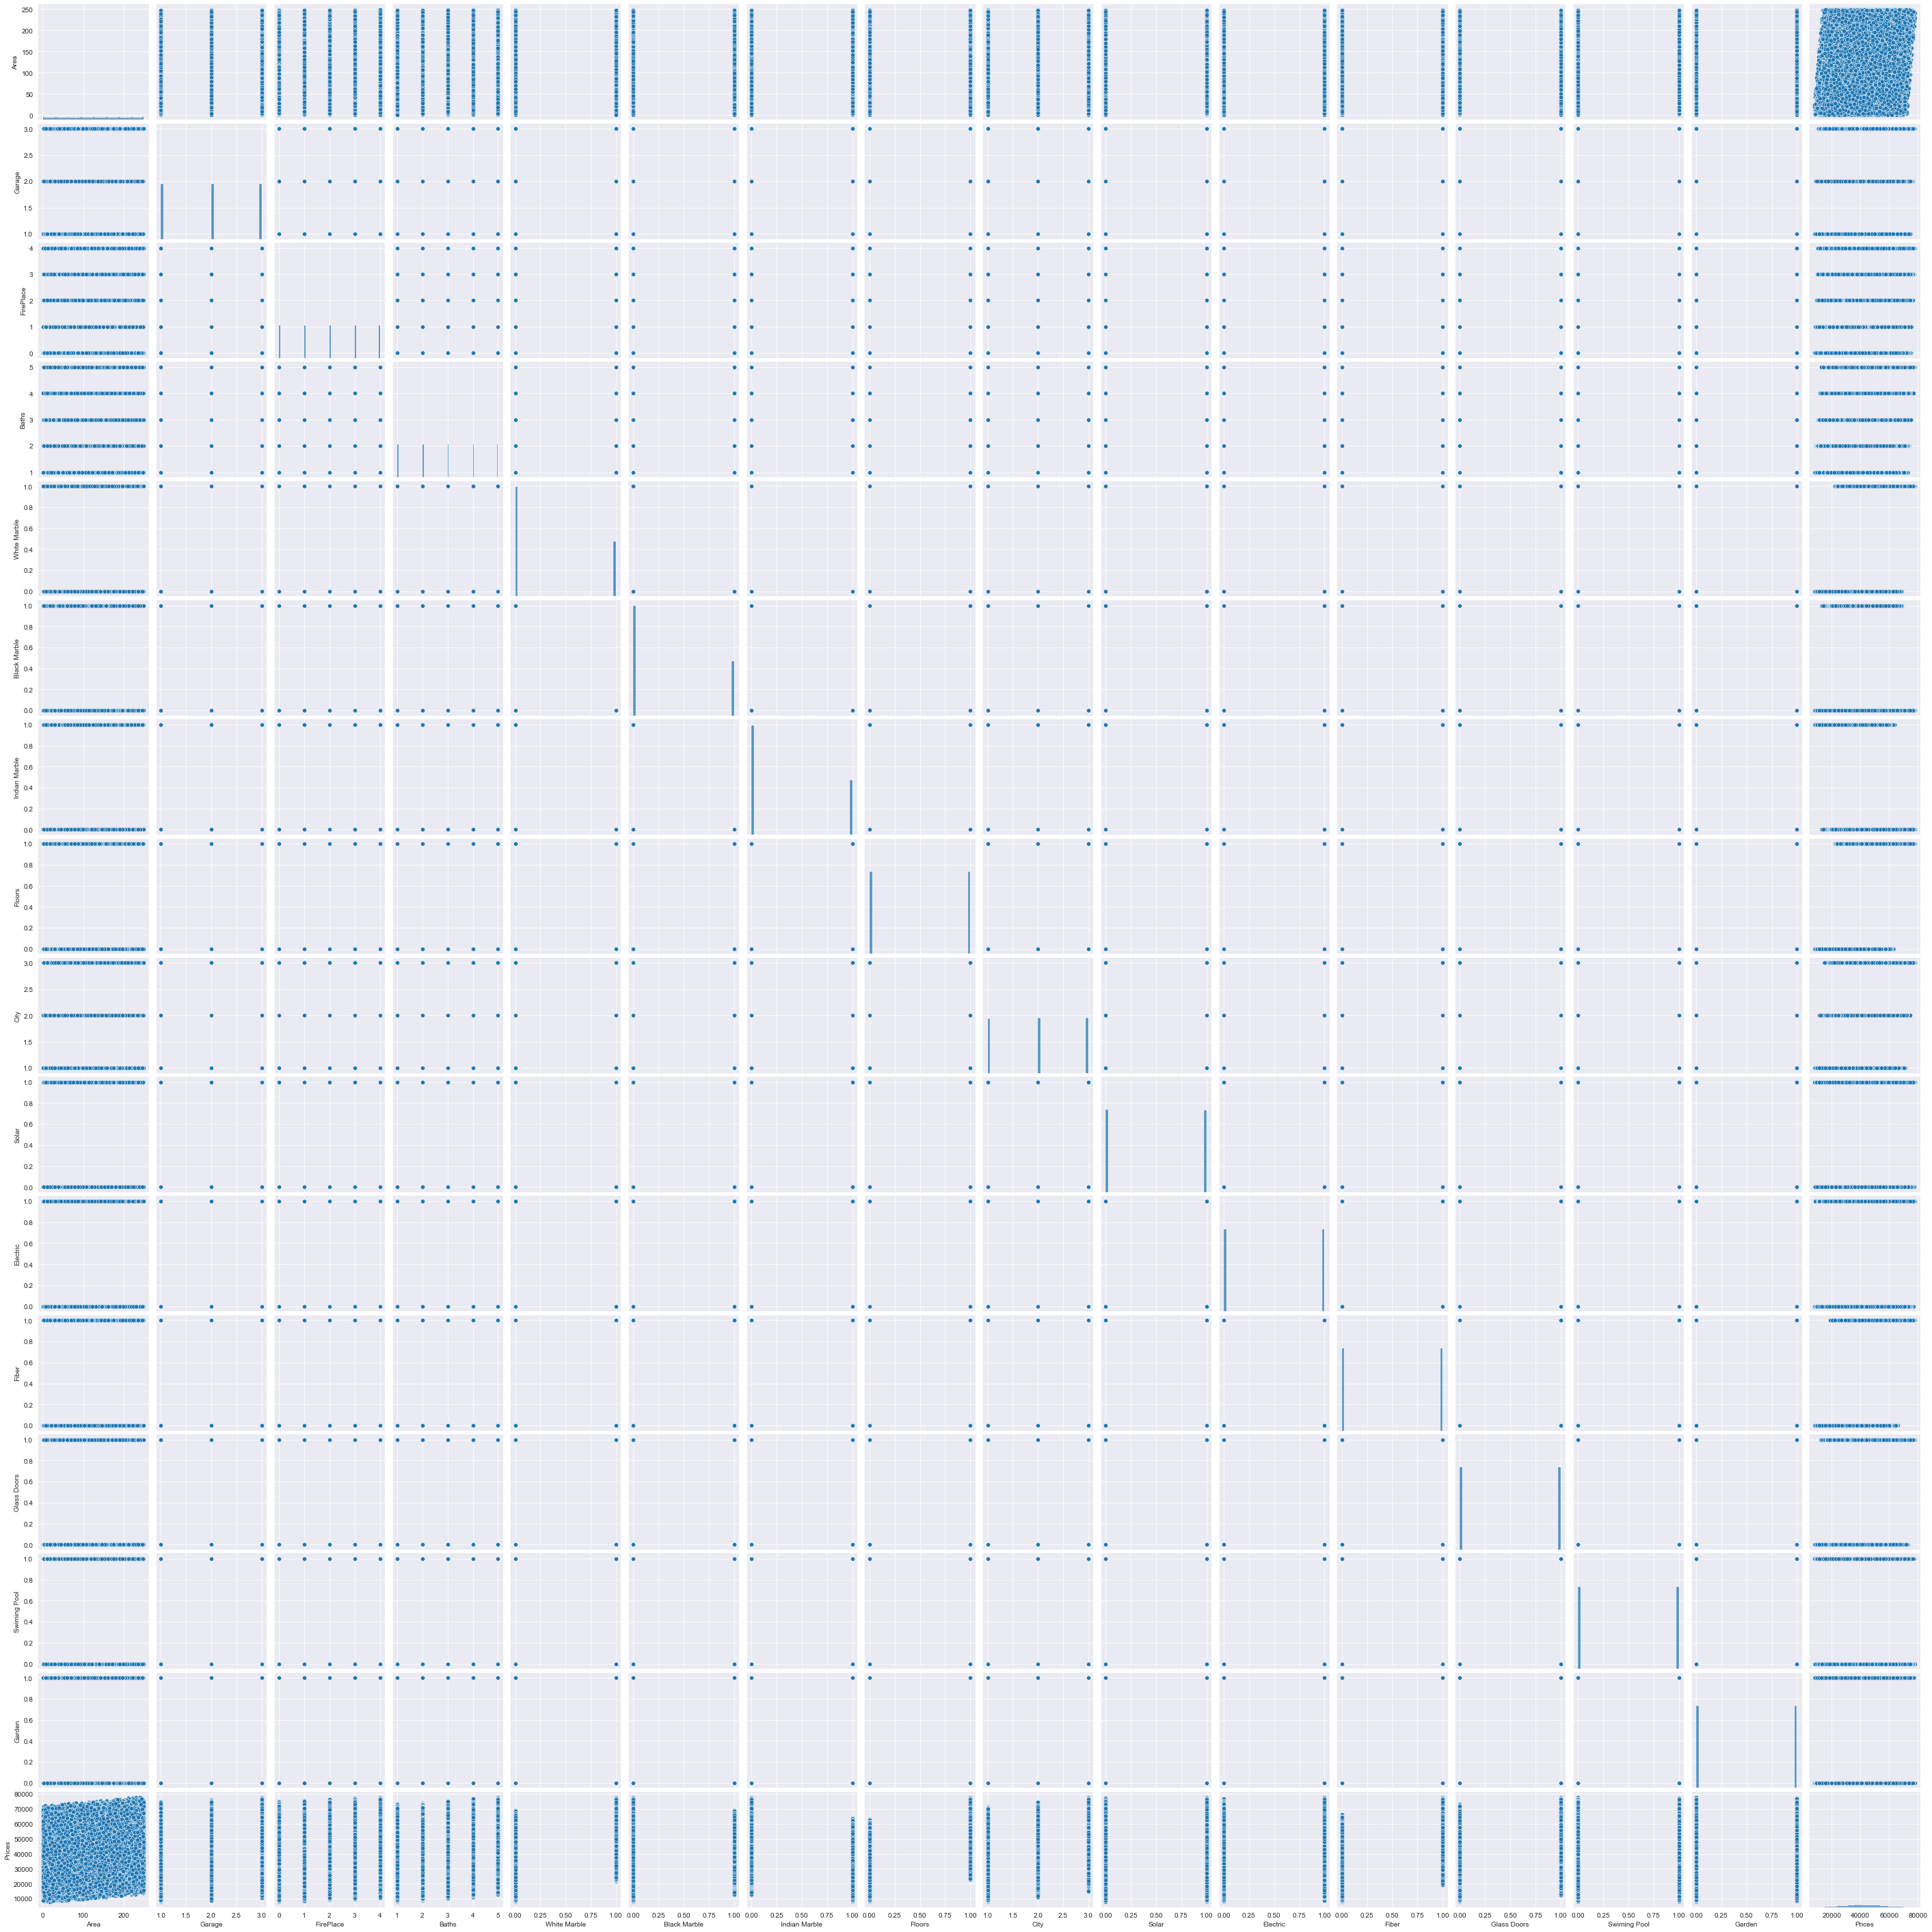

In [19]:
ax = sns.pairplot(dados)
ax

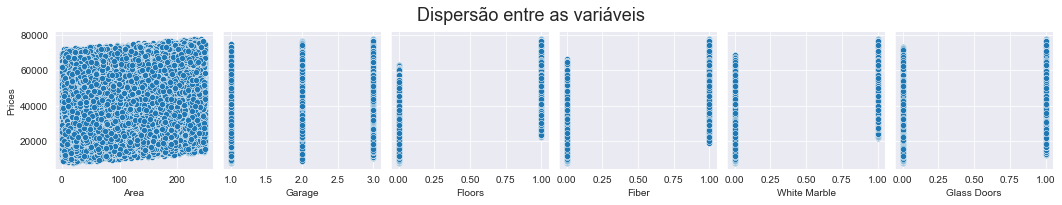

In [20]:
ax = sns.pairplot(dados, y_vars = ["Prices"], x_vars = ["Area", "Garage", "Floors", "Fiber", "White Marble", "Glass Doors"])
ax.fig.suptitle("Dispersão entre as variáveis", fontsize = 18, y = 1.10)
ax

# <font color='red' style='font-size: 30px;'>Estimando um Modelo de Regressão Linear</font>
<hr style='border: 2px solid red;'>

## Importando o *train_test_split* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [21]:
from sklearn.model_selection import train_test_split

## Criando uma Series (pandas) para armazenar a variável dependente (y)

In [22]:
y = dados['Prices']
type(y)

pandas.core.series.Series

## Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)

Primeiro irei testar o modelo com 6 variáveis explicativas, depois testarei apenas com as váriaveis que tiverem mais correlação de acordo com a matriz.

In [23]:
X = dados[["Area", "Garage", "Floors", "Fiber", "White Marble", "Glass Doors"]]
type(X)

pandas.core.frame.DataFrame

## Criando os datasets de treino e de teste

In [24]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 35)

In [25]:
print(f' {X_train.shape} \n {y_train.shape} \n {X_test.shape} \n {y_test.shape}')

 (350000, 6) 
 (350000,) 
 (150000, 6) 
 (150000,)


## Importando *LinearRegression* e *metrics* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Instanciando a classe *LinearRegression()*

In [27]:
modelo = LinearRegression()

## Utilizando o método *fit()* para estimar o modelo linear utilizando os dados de TREINO (y_train e X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [28]:
modelo.fit(X_train, y_train)

LinearRegression()

## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score


### Avalie:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>O modelo apresenta um bom ajuste?</li>
    <li>Você lembra o que representa o R²?</li>
    <li>Qual medida podemos tomar para melhorar essa estatística?</li>
</ul>

In [29]:
print(f'R² = {modelo.score(X_train, y_train).round(2)}')

R² = 0.88


* O modelo apresenta um bom ajuste, onde o R² é igual a 0.88
* O R² tem como objetivo ver quanto a linha de regressão se ajusta aos dados
* O R² explica 88% da variância dos dados
* R² --> as variáveis preditoras (X) conseguem explicar a variabilidade dos dados
* Para melhorar o R² deve-se adicionar novas variáveis

## Gerando previsões para os dados de TESTE (X_test) utilizando o método *predict()*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

In [30]:
y_previsto = modelo.predict(X_test)

## Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [31]:
print(f"R² = {metrics.r2_score(y_test, y_previsto).round(2)}")

R² = 0.88


#### Coeficientes do Modelo

In [32]:
modelo.coef_

array([   24.91150393,  1509.73002771, 14998.25686884, 11723.55040921,
       11517.65545338,  4442.22908433])

#### Intercepto

In [33]:
modelo.intercept_

16503.087684572587

# <font color='red' style='font-size: 30px;'>Obtendo Previsões Pontuais</font>
<hr style='border: 2px solid red;'>

## Criando um simulador simples

Crie um simulador que gere estimativas de preço a partir de um conjunto de informações de um imóvel.

In [34]:
Area = 50
Garage = 0
Floors = 0
Fiber = 0
White_Marble = 0
Glass_Doors = 0

entrada = [[Area, Garage, Floors, Fiber, White_Marble, Glass_Doors]]
print(f"{modelo.predict(entrada)[0].round(2)} Dolares")

17748.66 Dolares
